In [1]:
# Libraries for Basic Process 
import numpy as np
import pandas as pd
import string as st

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Pre-setting Plot Style
font={'size':15}
plt.rc('font', **font)
plt.rc('xtick',labelsize=12)    
plt.rc('ytick',labelsize=12)
sns.set_style({'xtick.bottom':True,'ytick.left':True,'text.color':'#9400D3',
               'axes.labelcolor': 'blue','patch.edgecolor': 'black'})



# sklearn Modules
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
#from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# scipy Modules
from scipy.stats import zscore
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
 
#from sklearn import preprocessing

from imblearn.over_sampling import SMOTE

# Module to Suppress Warnings
from warnings import filterwarnings
filterwarnings('ignore')

***
# <span style="color:#9400D3">Part THREE - **Project Based**                          
***

**DOMAIN:** Automobile


**CONTEXT:** The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.The vehicle may be viewed from one of many different angles.


**DATA DESCRIPTION:** The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles
were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of
vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more
difficult to distinguish between the cars.
 * All the features are numeric i.e. geometric features extracted from the silhouette.
    
    
**PROJECT OBJECTIVE:** Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the
model using just the raw data.


**Steps and tasks:** 
1. Data: Import, clean and pre-process the data
2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hiddenpatterns by using all possible methods.

    **For example:** Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.
    

3. Classifier: Design and train a best fit SVM classier using all the data attributes.
4. Dimensional reduction: perform dimensional reduction on the data.
5. Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.
6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

### <span style="color:#9400D3"> 1. Data: Import, Clean and Pre-Process the Data

### Exploring Dataset 

In [2]:
# Loading Data
vehidata = pd.read_csv('Vehicle.csv')

# Getting Shape and Size
shape = vehidata.shape

# Displaying Dataset
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',shape[0],'\n Number of Columns =',shape[1])
print('\033[1m\nDataset:-')
display(vehidata.head())

Dataset consist:-
 Number of Rows    = 846 
 Number of Columns = 19

Dataset:-


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

***
**Key Observations:-**
* Dataset has 846 rows and 19 columns
***

### Checking for Null Values in the Attributes

In [3]:
# Checking for Null Values in the Attributes
print('\n\033[1mNull Values in the Features:-')
display(vehidata.isnull().sum().to_frame('Null Values'))


Null Values in the Features:-


Null Values
compactness                            0
circularity                            5
distance_circularity                   4
radius_ratio                           6
pr.axis_aspect_ratio                   2
max.length_aspect_ratio                0
scatter_ratio                          1
elongatedness                          1
pr.axis_rectangularity                 3
max.length_rectangularity              0
scaled_variance                        3
scaled_variance.1                      2
scaled_radius_of_gyration              2
scaled_radius_of_gyration.1            4
skewness_about                         6
skewness_about.1                       1
skewness_about.2                       1
hollows_ratio                          0
class                                  0

***
**Key Observations:-**
* Found some Null Values

### Dropping Null Values

In [4]:
# Dropping Null Values
vehidata.dropna(inplace=True)

# Checking for Null Values After Dropping
print('\n\033[1mNull Values in the Features:-')
display(vehidata.isnull().sum().to_frame('Null Values'))


Null Values in the Features:-


Null Values
compactness                            0
circularity                            0
distance_circularity                   0
radius_ratio                           0
pr.axis_aspect_ratio                   0
max.length_aspect_ratio                0
scatter_ratio                          0
elongatedness                          0
pr.axis_rectangularity                 0
max.length_rectangularity              0
scaled_variance                        0
scaled_variance.1                      0
scaled_radius_of_gyration              0
scaled_radius_of_gyration.1            0
skewness_about                         0
skewness_about.1                       0
skewness_about.2                       0
hollows_ratio                          0
class                                  0

***
**Key Observations:-**
* All Null values are removed
***

### Checking the Datatypes of Each Attribute.

In [5]:
# Checking the Datatypes
print('\n\033[1mData Types of Each Attribute:-')
display(vehidata.dtypes.to_frame('Data Type'))


Data Types of Each Attribute:-


Data Type
compactness                     int64
circularity                   float64
distance_circularity          float64
radius_ratio                  float64
pr.axis_aspect_ratio          float64
max.length_aspect_ratio         int64
scatter_ratio                 float64
elongatedness                 float64
pr.axis_rectangularity        float64
max.length_rectangularity       int64
scaled_variance               float64
scaled_variance.1             float64
scaled_radius_of_gyration     float64
scaled_radius_of_gyration.1   float64
skewness_about                float64
skewness_about.1              float64
skewness_about.2              float64
hollows_ratio                   int64
class                          object

***
**Key Observations:-**
* Datatypes are fine, no change needed.
***

### Outlier Analysis

* Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.”
* An outlier is an observation that lies an abnormal distance from other values in the attribute of dataset.
* Since we have few outliers or extreme values, we will replace them by their respective mean of attribute.

NOTE:- Here we are Replacing Outliers by Mean of the Attribute without outliers. That is we will calculate Mean without outliers and then replace outliers with this calculated Mean

In [6]:
# Getting Outliers and Imputing Outliers by Mean

AT = []
OL1 = []
OL2 = []
M1 = []
M2 = []
for i in vehidata.columns:
    if i!='class':
        AT.append(i)
        
        # Getting Interquartile Range
        q1 = vehidata[i].quantile(0.25)
        q3 = vehidata[i].quantile(0.75)
        IQR = q3 - q1
        
        # Getting Mean of Attribute having Outliers (i.e including outliers)
        M1.append(round(vehidata[i].mean(),2)) 
        
        # Getting Outlier and Normal Values Seperated
        OL = []
        NOL = []
        for k in vehidata[i]:
            if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
                OL.append(k)
            else:
                NOL.append(k)
        OL1.append(len(OL))
        
        # Replacing Outliers by Mean of Normal Values
        vehidata[i].replace(OL,np.mean(NOL),inplace=True) # Here we are imputing outliers by Mean of attribute without outlier
        
        # Getting Outliers After Imputation
        OL_cnt = 0
        for k in vehidata[i]:
            if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
                OL_cnt += 1
        OL2.append(OL_cnt)
        
# Creting dataframe for better representation of Outlier Analysis      
Outlier_Analysis = pd.DataFrame({'Attribute':AT,
                                 'Mean Including Outliers':M1,
                                 'Outliers Before Imputation':OL1,
                                 'Outliers After Imputation':OL2})
print('\033[1mTotal Outliers Observed in Dataset =',sum(OL1))
print('\n\033[1mTable Showing Outlier Analysis:-')
display(Outlier_Analysis)    

Total Outliers Observed in Dataset = 57

Table Showing Outlier Analysis:-


Attribute  Mean Including Outliers  \
0                   compactness                    93.66   
1                   circularity                    44.80   
2          distance_circularity                    82.04   
3                  radius_ratio                   169.10   
4          pr.axis_aspect_ratio                    61.77   
5       max.length_aspect_ratio                     8.60   
6                 scatter_ratio                   168.56   
7                 elongatedness                    40.99   
8        pr.axis_rectangularity                    20.56   
9     max.length_rectangularity                   147.89   
10              scaled_variance                   188.38   
11            scaled_variance.1                   438.38   
12    scaled_radius_of_gyration                   174.25   
13  scaled_radius_of_gyration.1                    72.40   
14               skewness_about                     6.35   
15             skewness_about.1                    12.69   
16             skewness_about.2                   188.98   
17                hollows_ratio                   195.73   

    Outliers Before Imputation  Outliers After Imputation  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            3                          0  
4                            8                          0  
5                           13                          0  
6                            0                          0  
7                            0                          0  
8                            0                          0  
9                            0                          0  
10                           1                          0  
11                           2                          0  
12                           0                          0  
13                          15                          0  
14                          12                          0  
15                           3                          0  
16                           0                          0  
17                           0                          0

***
**Key Observations:-**
* We found some outliers in the data.
* All outliers are replaced by the mean value of respective attribute.
***

### <span style="color:#9400D3"> 2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hiddenpatterns by using all possible methods

### Brief Summary of Data

In [7]:
# Describing the data interms of count, mean, standard deviation, and 5 point summary
print('\n\033[1mBrief Summary of Dataset:-')
display(vehidata.describe()[1:].T)


Brief Summary of Dataset:-


mean         std    min    25%    50%  \
compactness                   93.656827    8.233751   73.0   87.0   93.0   
circularity                   44.803198    6.146659   33.0   40.0   44.0   
distance_circularity          82.043050   15.783070   40.0   70.0   79.0   
radius_ratio                 168.538272   32.322218  104.0  141.0  167.0   
pr.axis_aspect_ratio          61.233540    5.639203   47.0   57.0   61.0   
max.length_aspect_ratio        8.133750    2.073374    3.0    7.0    8.0   
scatter_ratio                168.563346   33.082186  112.0  146.0  157.0   
elongatedness                 40.988930    7.803380   26.0   33.0   43.0   
pr.axis_rectangularity        20.558426    2.573184   17.0   19.0   20.0   
max.length_rectangularity    147.891759   14.504648  118.0  137.0  146.0   
scaled_variance              188.215517   30.821257  130.0  167.0  179.0   
scaled_variance.1            436.977805  172.969108  184.0  318.0  364.0   
scaled_radius_of_gyration    174.252153   32.332161  109.0  149.0  173.0   
scaled_radius_of_gyration.1   71.887218    6.103767   59.0   67.0   71.0   
skewness_about                 6.131086    4.577902    0.0    2.0    6.0   
skewness_about.1              12.586420    8.770504    0.0    6.0   11.0   
skewness_about.2             188.979090    6.153681  176.0  184.0  189.0   
hollows_ratio                195.729397    7.398781  181.0  191.0  197.0   

                               75%    max  
compactness                  100.0  119.0  
circularity                   49.0   59.0  
distance_circularity          98.0  112.0  
radius_ratio                 195.0  252.0  
pr.axis_aspect_ratio          65.0   76.0  
max.length_aspect_ratio       10.0   13.0  
scatter_ratio                198.0  265.0  
elongatedness                 46.0   61.0  
pr.axis_rectangularity        23.0   29.0  
max.length_rectangularity    159.0  188.0  
scaled_variance              216.0  288.0  
scaled_variance.1            586.0  987.0  
scaled_radius_of_gyration    198.0  268.0  
scaled_radius_of_gyration.1   75.0   87.0  
skewness_about                 9.0   19.0  
skewness_about.1              19.0   38.0  
skewness_about.2             193.0  206.0  
hollows_ratio                201.0  211.0

### **Checking Skewness of the data attributes**

In [8]:
# Checking skewness of the data attributes
print('\033[1m\nSkewness of all attributes:-')  
display(vehidata.skew().to_frame(name='Skewness'))


Skewness of all attributes:-


Skewness
compactness                  0.386048
circularity                  0.272723
distance_circularity         0.114244
radius_ratio                 0.112252
pr.axis_aspect_ratio         0.151030
max.length_aspect_ratio      0.075688
scatter_ratio                0.596913
elongatedness                0.053941
pr.axis_rectangularity       0.759483
max.length_rectangularity    0.271183
scaled_variance              0.570150
scaled_variance.1            0.792170
scaled_radius_of_gyration    0.266943
scaled_radius_of_gyration.1  0.531221
skewness_about               0.620049
skewness_about.1             0.630575
skewness_about.2             0.255880
hollows_ratio               -0.229941

### **Checking Variance of the data attributes**

In [9]:
# Checking Variance data attributes
print('\033[1m\nVariance of all attributes:-')   
display(vehidata.var().to_frame(name='Variance'))


Variance of all attributes:-


Variance
compactness                     67.794649
circularity                     37.781418
distance_circularity           249.105287
radius_ratio                  1044.725756
pr.axis_aspect_ratio            31.800609
max.length_aspect_ratio          4.298878
scatter_ratio                 1094.431019
elongatedness                   60.892734
pr.axis_rectangularity           6.621274
max.length_rectangularity      210.384821
scaled_variance                949.949858
scaled_variance.1            29918.312316
scaled_radius_of_gyration     1045.368607
scaled_radius_of_gyration.1     37.255972
skewness_about                  20.957187
skewness_about.1                76.921737
skewness_about.2                37.867789
hollows_ratio                   54.741955

### **Checking Covariance related with attributes**

In [10]:
# Checking Covariance related with all attributes
print('\033[1mCovariance between all attributes:-')
display(vehidata.cov())

Covariance between all attributes:-


compactness  circularity  distance_circularity  \
compactness                    67.794649    34.915138            102.657649   
circularity                    34.915138    37.781418             77.387793   
distance_circularity          102.657649    77.387793            249.105287   
radius_ratio                  191.890805   127.520802            407.822003   
pr.axis_aspect_ratio            9.013851     7.132800             22.526953   
max.length_aspect_ratio         8.763890     7.219940             22.154515   
scatter_ratio                 221.732972   174.500167            474.635816   
elongatedness                 -50.633114   -39.576073           -112.410853   
pr.axis_rectangularity         17.250986    13.541069             36.440216   
max.length_rectangularity      80.601971    86.067342            177.066242   
scaled_variance               196.094987   154.066396            425.343723   
scaled_variance.1            1160.013639   898.171024           2433.981199   
scaled_radius_of_gyration     154.778757   185.935153            360.113516   
scaled_radius_of_gyration.1   -13.004222     2.461128            -23.702933   
skewness_about                  7.213691     3.754326              6.842198   
skewness_about.1               11.812800     0.116653             38.045354   
skewness_about.2               15.007594    -4.308307             14.108044   
hollows_ratio                  22.711209     2.243477             40.080629   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                    191.890805              9.013851   
circularity                    127.520802              7.132800   
distance_circularity           407.822003             22.526953   
radius_ratio                  1044.725756            119.531422   
pr.axis_aspect_ratio           119.531422             31.800609   
max.length_aspect_ratio         31.351552              1.701886   
scatter_ratio                  834.169972             39.184783   
elongatedness                 -210.036192            -13.735376   
pr.axis_rectangularity          62.636143              2.544751   
max.length_rectangularity      272.485857             12.800523   
scaled_variance                796.741486             39.472649   
scaled_variance.1             4339.966946            209.110578   
scaled_radius_of_gyration      584.670842             30.429108   
scaled_radius_of_gyration.1    -77.554215            -10.601513   
skewness_about                   4.623453             -1.464573   
skewness_about.1                52.023414             -1.466047   
skewness_about.2                79.507103             13.594577   
hollows_ratio                  117.682594             16.968727   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 8.763890     221.732972   
circularity                                 7.219940     174.500167   
distance_circularity                       22.154515     474.635816   
radius_ratio                               31.351552     834.169972   
pr.axis_aspect_ratio                        1.701886      39.184783   
max.length_aspect_ratio                     4.298878      34.909070   
scatter_ratio                              34.909070    1094.431019   
elongatedness                              -8.375005    -251.289323   
pr.axis_rectangularity                      2.713388      84.444878   
max.length_rectangularity                  19.697326     387.788885   
scaled_variance                            27.059780     981.754300   
scaled_variance.1                         174.397310    5644.556586   
scaled_radius_of_gyration                  27.811124     851.147185   
scaled_radius_of_gyration.1                -4.254559      -2.068993   
skewness_about                              0.815054       8.902511   
skewness_about.1                            2.480241      65.451355   
skewness_about.2                            1.

***
**Key Observations:-**
* In this data the mean value of attributes are almost equal to median. Hence we can expect normal distribution of the data.
* There is some slight skewness in the data
* Variance is high for most of the data.
***

### <u> Univariate Analysis</u>

Plot Showing Frequency Distribution of Attribute Class:-


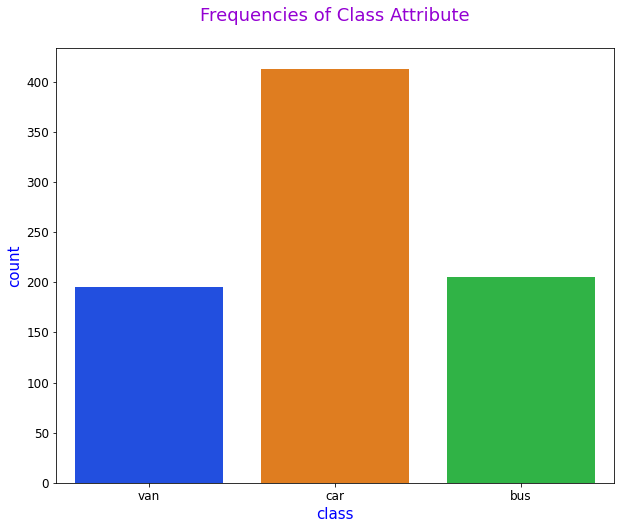


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of Class feature:-



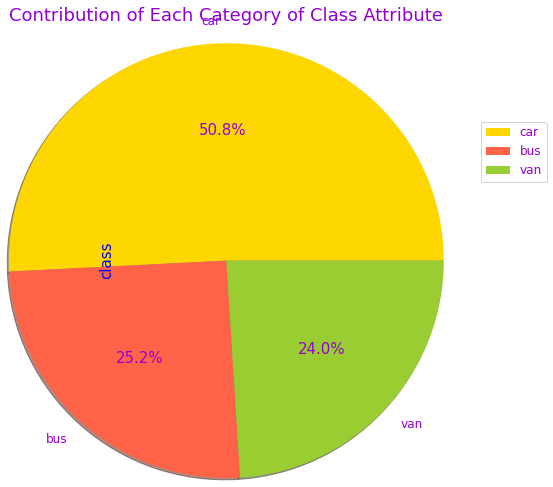

In [11]:
# Plotting Frequency Distribution of categorical attribute
colors = ['gold','tomato','yellowgreen','#ADD8E6']
print(f'\033[1mPlot Showing Frequency Distribution of Attribute Class:-')
plt.figure(figsize=(10,8))
plt.title(f'Frequencies of Class Attribute\n')
sns.countplot(vehidata['class'],palette='bright');
plt.show()
print('\n___________________________________________________________________________________')
print('')
    
# Plotting Pie Chart to check contribution of categorical attribute
print(f'\033[1m\nPie Chart Showing Contribution of Each Category of Class feature:-\n')
plt.title(f'Contribution of Each Category of Class Attribute\n\n\n\n\n\n')
vehidata['class'].value_counts().plot.pie(radius=2.5,shadow=True,autopct='%1.1f%%',colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

***
**Key Observations:-**
* Car has covered 50% of the data.
* Bus and Van contributions are almost equal.
***

### <u> Bivariate Analysis</u>
    
* Bivariate Analysis is performed to find the relationship between Class Attribute VS all other Attributes


Plots Showing Bivariate Analysis of Class VS All Attributes:-



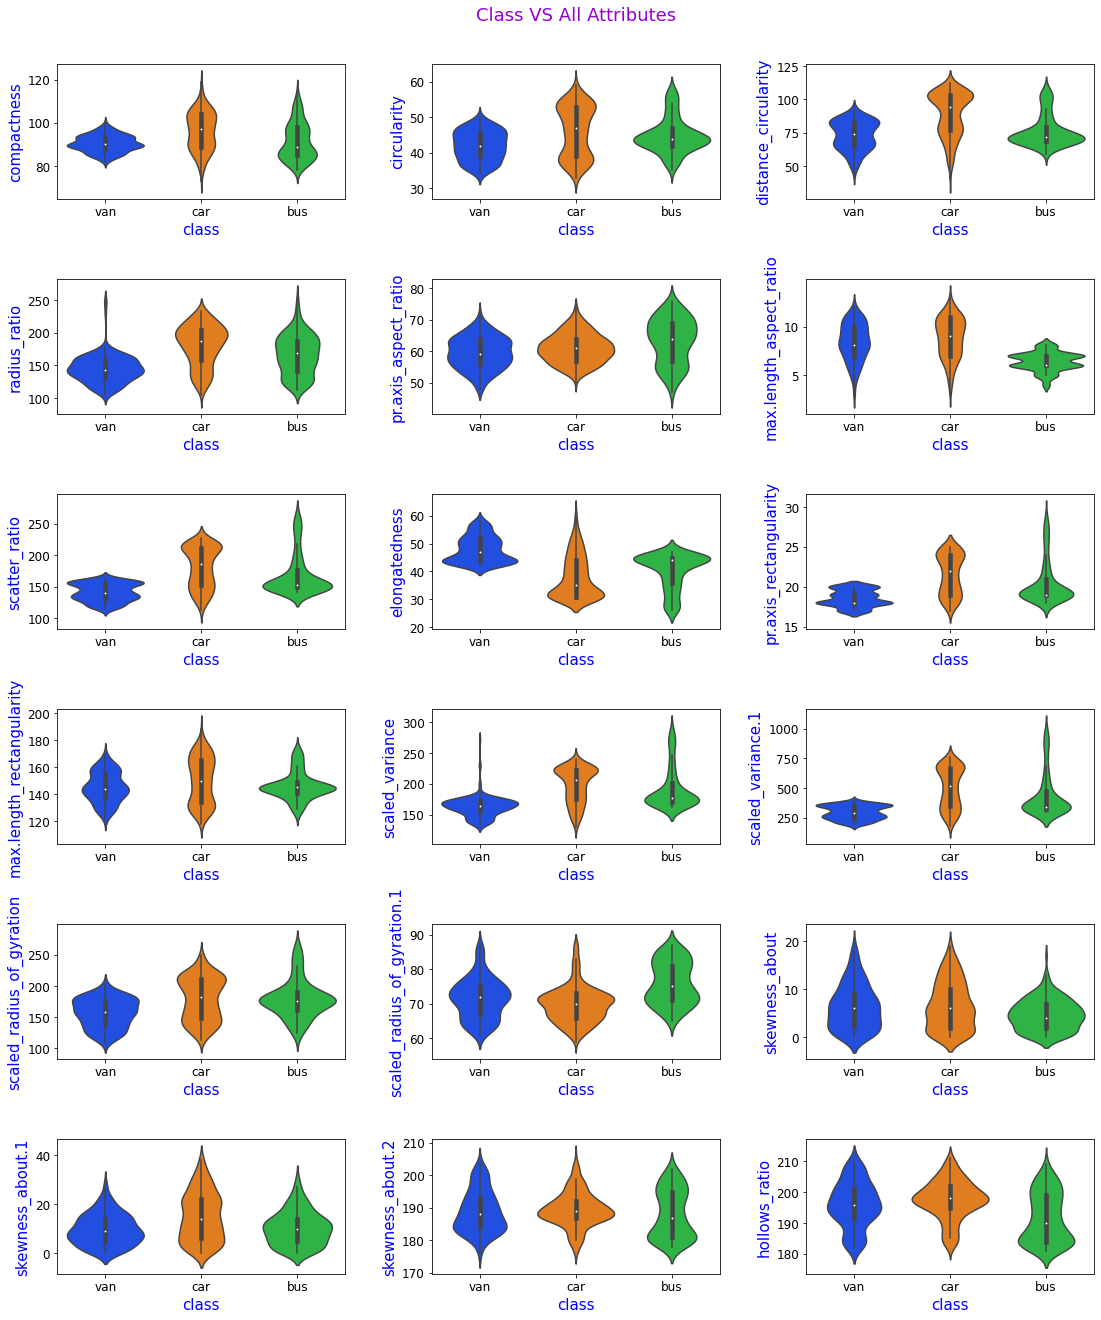

In [12]:
# Bivariate Analysis for Class VS All Attributes
print(f'\033[1m\nPlots Showing Bivariate Analysis of Class VS All Attributes:-\n')

# Setting up Sub-Plots
fig, axes = plt.subplots(6, 3, figsize=(18, 20))
fig.suptitle(f'Class VS All Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.6)

# Plotting Sub-Plots
sns.violinplot(ax=axes[0, 0], x='class', y='compactness', data=vehidata, palette='bright');
sns.violinplot(ax=axes[0, 1], x='class', y='circularity', data=vehidata, palette='bright');
sns.violinplot(ax=axes[0, 2], x='class', y='distance_circularity', data=vehidata, palette='bright');
sns.violinplot(ax=axes[1, 0], x='class', y='radius_ratio', data=vehidata, palette='bright');
sns.violinplot(ax=axes[1, 1], x='class', y='pr.axis_aspect_ratio', data=vehidata, palette='bright');
sns.violinplot(ax=axes[1, 2], x='class', y='max.length_aspect_ratio', data=vehidata, palette='bright');
sns.violinplot(ax=axes[2, 0], x='class', y='scatter_ratio', data=vehidata, palette='bright');
sns.violinplot(ax=axes[2, 1], x='class', y='elongatedness', data=vehidata, palette='bright');
sns.violinplot(ax=axes[2, 2], x='class', y='pr.axis_rectangularity', data=vehidata, palette='bright');
sns.violinplot(ax=axes[3, 0], x='class', y='max.length_rectangularity', data=vehidata, palette='bright');
sns.violinplot(ax=axes[3, 1], x='class', y='scaled_variance', data=vehidata, palette='bright');
sns.violinplot(ax=axes[3, 2], x='class', y='scaled_variance.1', data=vehidata, palette='bright');
sns.violinplot(ax=axes[4, 0], x='class', y='scaled_radius_of_gyration', data=vehidata, palette='bright');
sns.violinplot(ax=axes[4, 1], x='class', y='scaled_radius_of_gyration.1', data=vehidata, palette='bright');
sns.violinplot(ax=axes[4, 2], x='class', y='skewness_about', data=vehidata, palette='bright');
sns.violinplot(ax=axes[5, 0], x='class', y='skewness_about.1', data=vehidata, palette='bright');
sns.violinplot(ax=axes[5, 1], x='class', y='skewness_about.2', data=vehidata, palette='bright');
sns.violinplot(ax=axes[5, 2], x='class', y='hollows_ratio', data=vehidata, palette='bright');
plt.show()

***

### <u> Multivariate Analysis</u>
    
 Multivariate analysis is performed to understand interactions between different fields in the dataset.
    
#### Multivariate Analysis : To Check Relation Between Attributes

Plot Showing Multivariate Analysis to check Relation between Attributes:-


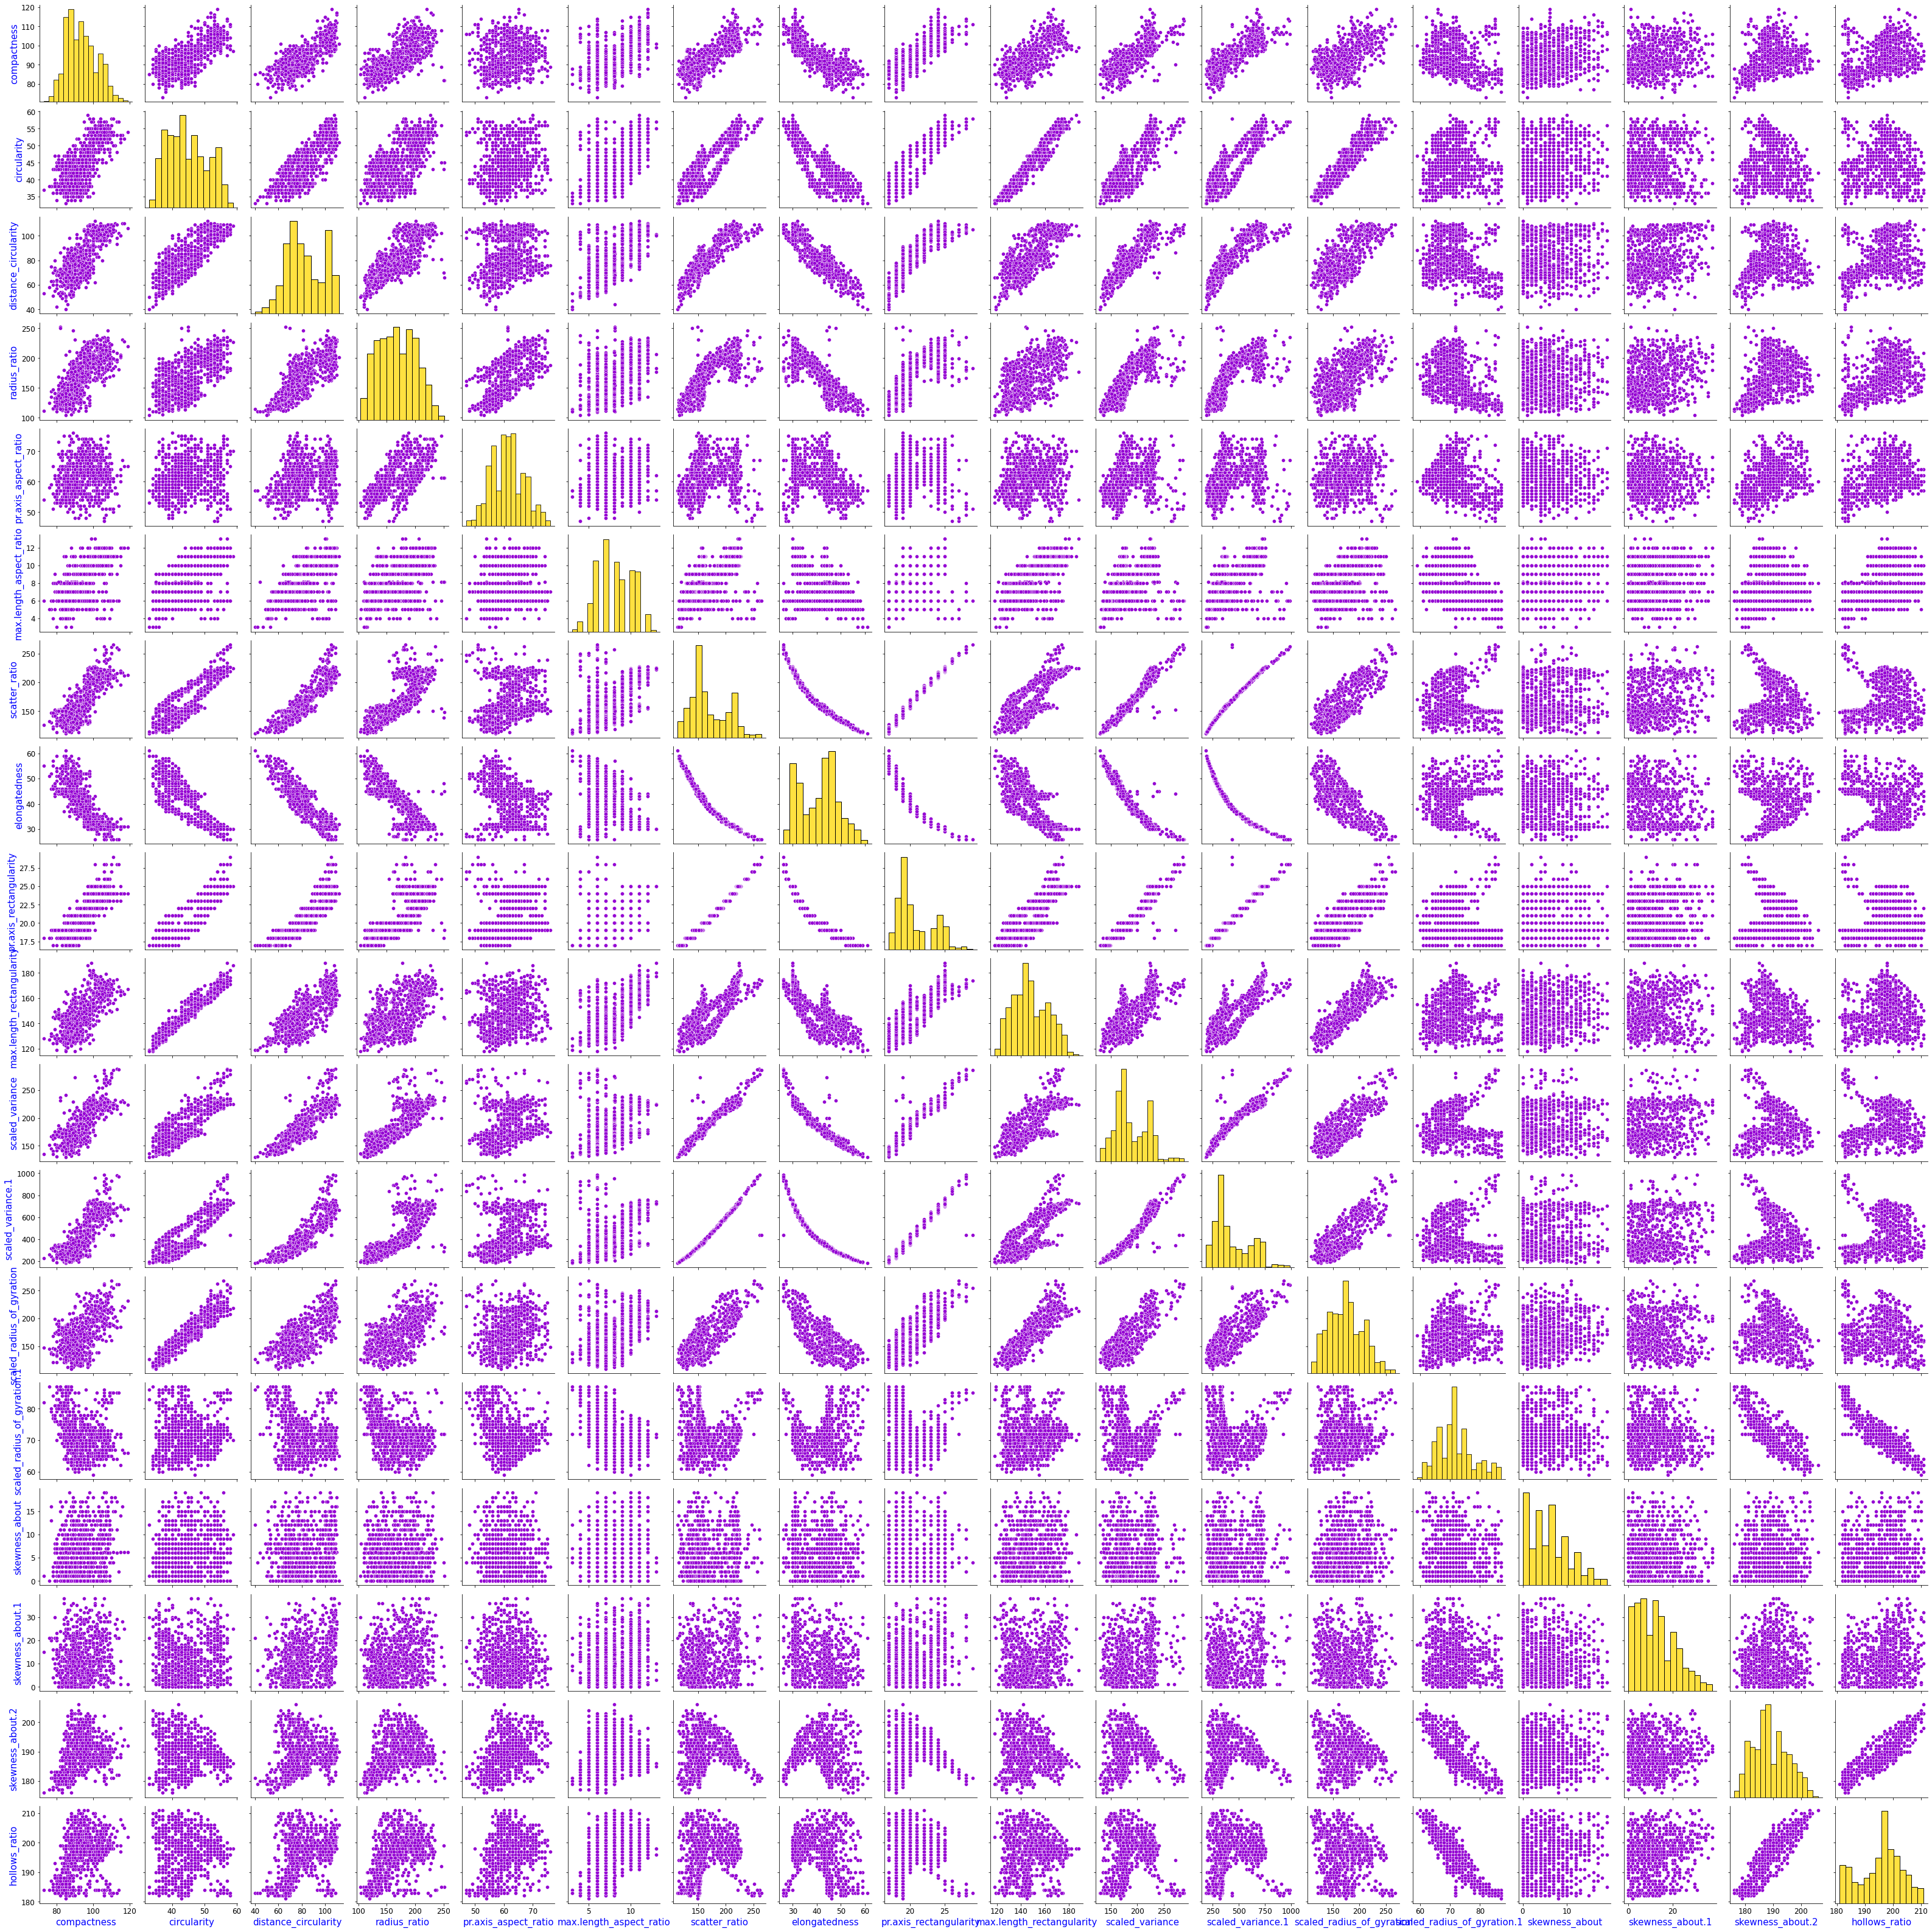

In [13]:
# Multivariate Analysis of Attributes
print('\033[1mPlot Showing Multivariate Analysis to check Relation between Attributes:-')

# Plotting pairplot for Attributes
sns.pairplot(vehidata,plot_kws={'color':'#9400D3'},diag_kws={'color':'Gold'})
plt.show()

#### Multivariate Analysis : To Check Correlation

Heatmap showing Correlation of Data attributes:-


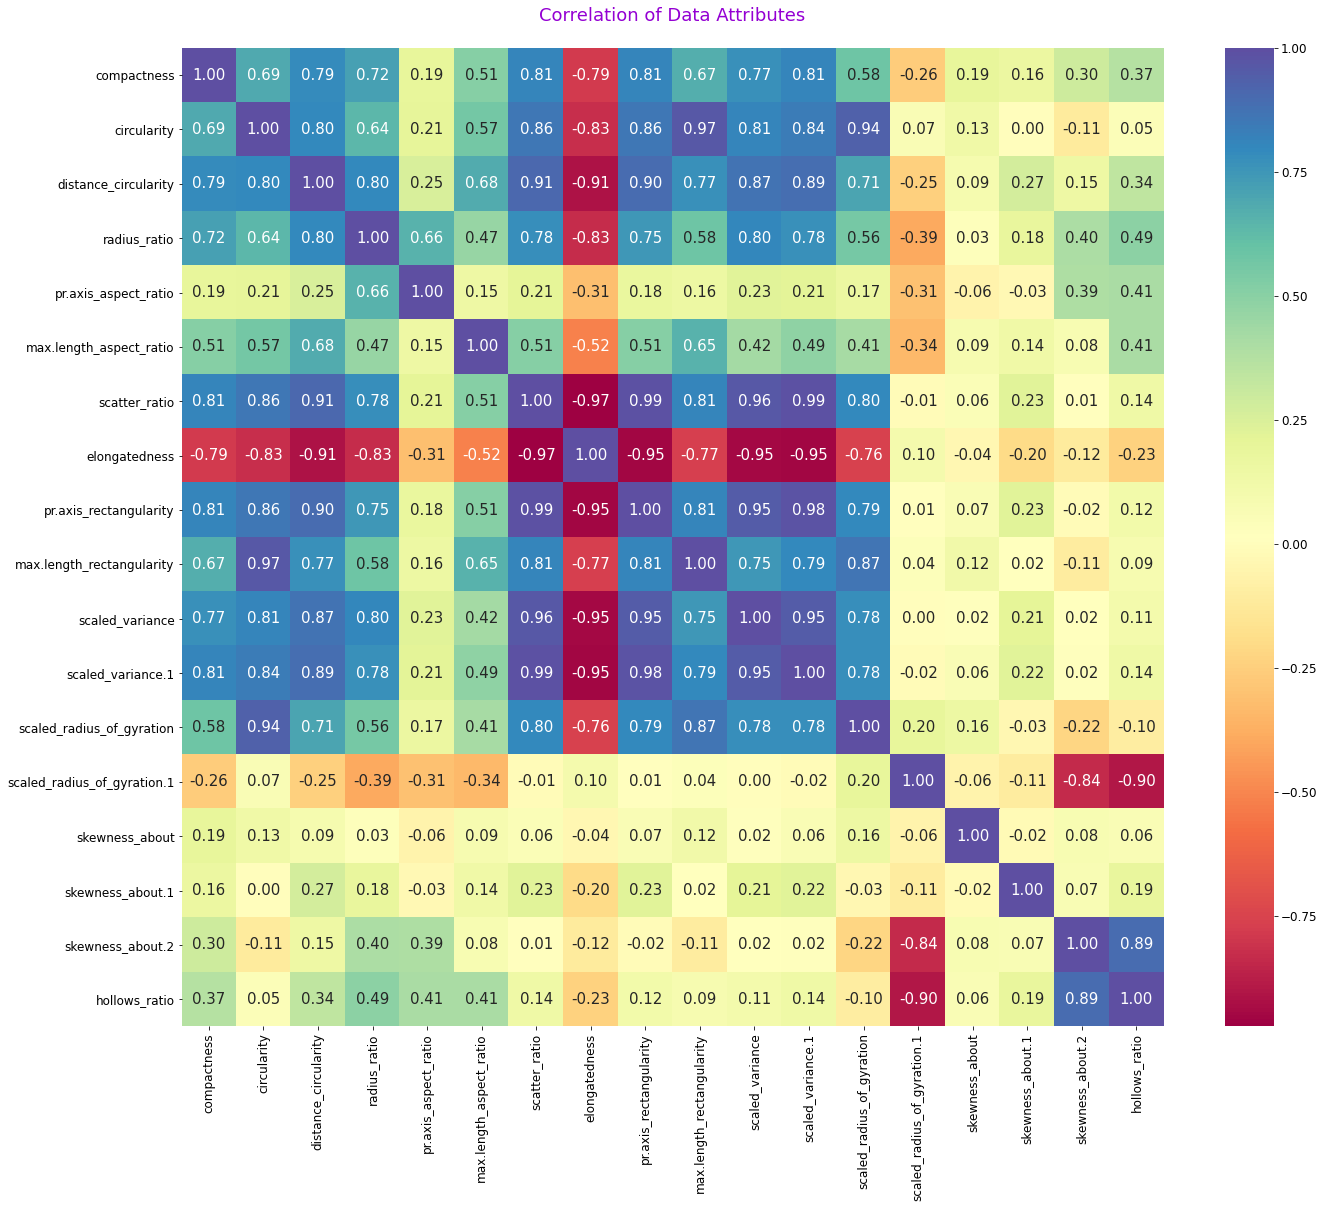

In [14]:
# Plotting Heatmap for checking Correlation
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(22,18))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(vehidata.corr(),annot=True,fmt= '.2f',cmap='Spectral');
plt.show()

***
**Key Observations:-**
* Most of attributes are Positively Correlated
***



### <span style="color:#9400D3"> 3. Classifier: Design and train a best fit SVM classier using all the data attributes.

### Segregating Predictors VS Target Attributes and Scaling by zscores

In [15]:
# Seperating Independent and Dependent Attributes

# Getting Predictors by dropping Class Attribute
X = vehidata.drop(columns='class')

# Getting Target Attribute
y = vehidata['class']

# Applying Z-Scores to Predictors
X_Scale = X.apply(zscore)

***
**Key Observations:-**
* Predictors VS Target Attributes are segregated.
* Predictors are Scaled using zscores.
***

### Check for Target Balancing

Table Showing Total Observations of class:-


Total Observations
car                 413
bus                 205
van                 195



Pie Chart Showing Percentage of Each Category of Target Attribute:-


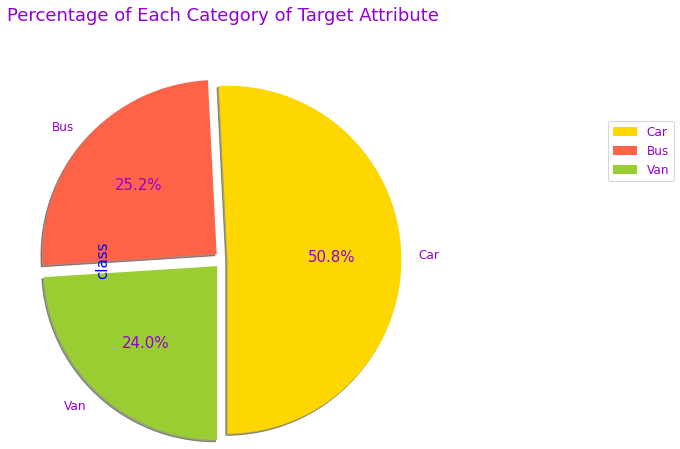

In [16]:
# Checking Value Counts of Target Attribute
print('\033[1mTable Showing Total Observations of class:-')
TAC = y.value_counts().to_frame('Total Observations')
display(TAC)

# Getting Percentages of each category in Target Attribute
labels = ['Car','Bus','Van']
print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-90,labels=labels,colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* There is target imbalance in the data.
***

### Fixing Target Imbalance by Synthetic Minority Oversampling Technique (SMOTE)
SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

Table Showing Total Observations in each section of target data for SMOTE:-


__________Total Observations__________                    
                        Before Tranformation After Tranformation
bus                                      205                 413
car                                      413                 413
van                                      195                 413
Total                                    813                1239



Pie Chart Showing Percentage of Each Category of Target Attribute:-


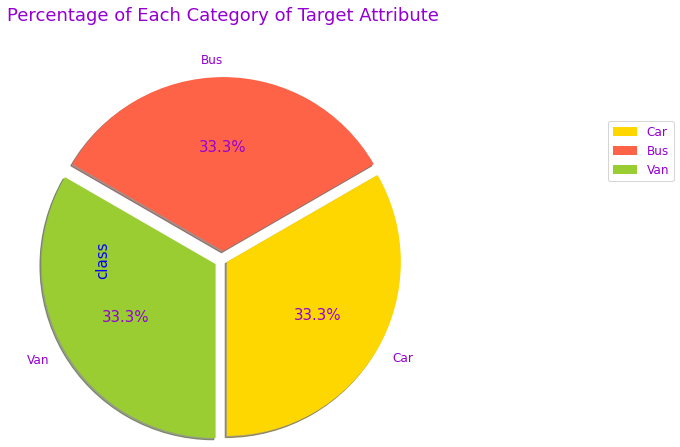

In [17]:
# Getting total observations of target attribute before transformation
yct = y.count()

# Transforming the dataset
OS = SMOTE(random_state=1)
X, y = OS.fit_resample(X_Scale, y)

# Checking Value Counts of Target Attribute after transforming
print('\033[1mTable Showing Total Observations in each section of target data for SMOTE:-') 
TAC2 = y.value_counts().to_frame('Total Observations')

# For better representation of Transformation
TVC = pd.DataFrame({'Before Tranformation':TAC['Total Observations'],'After Tranformation':TAC2['Total Observations']})
total  = pd.Series({'Before Tranformation':yct,'After Tranformation':y.count()},name='Total')
TVC = TVC.append(total)
columns=[('__________Total Observations__________', 'Before Tranformation'), ('__________Total Observations__________', 
                                                                              'After Tranformation')]
TVC.columns = pd.MultiIndex.from_tuples(columns)
display(TVC)

# Getting Percentages of each category in Target Attribute
labels = ['Car','Bus','Van']
print('\033[1m\n\nPie Chart Showing Percentage of Each Category of Target Attribute:-')
plt.title('Percentage of Each Category of Target Attribute\n\n\n\n\n\n')
explode = (0.05, 0.1, 0.1)
y.value_counts().plot.pie(radius=2,explode=explode,shadow=True,autopct='%1.1f%%',startangle=-90,labels=labels,colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2.6, 1))
plt.show()

***
**Key Observations:-**
* Target imbalance is fixed using SMOTE.
***

###  Performing Train-Test Split.

In [18]:
# Splitting into Train and Test Sets in 

# Here test_size is not given because by default its value is 0.25.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# For better observation of Splitted Data
TTS = pd.DataFrame({'Train':y_train.value_counts(),'Test':y_test.value_counts(),'Total Observations':y.value_counts()})
total  = pd.Series({'Train':y_train.count(),'Test':y_test.count(),'Total Observations':y.shape[0]},name='Total')
TTS = TTS.append(total)
print('\033[1mTable Showing Train-Test Split of Data:-')
display(TTS)

Table Showing Train-Test Split of Data:-


Train  Test  Total Observations
bus      310   103                 413
car      309   104                 413
van      310   103                 413
Total    929   310                1239

***
**Key Observations:-**
* Data is splitted into train and test data.
***

### Fitting SVM Model and Getting Accuracy

In [19]:
# Fitting SVM Classifier
model = SVC(gamma=0.025, C=3) 
model.fit(X_train, y_train)

# Getting Accuracy of Test Data
print('\033[1mAccuracy(%)\n Train Data =',round(model.score(X_train, y_train)*100,2),'%')
print('\033[1m Test Data  =',round(model.score(X_test, y_test)*100,2),'%')

Accuracy(%)
 Train Data = 98.17 %
 Test Data  = 96.13 %


***
**Key Observations:-**
* SVM Model is fitted and accuracies are displayed.
***

### <span style="color:#9400D3"> 4. Dimensional reduction: Perform Dimensional Reduction on the Data.

### Fitting PCA

In [20]:
# Fitting PCA
pca = PCA(n_components=18)
display(pca.fit(X))

PCA(n_components=18)

### Plotting Eigen Value to get dimension

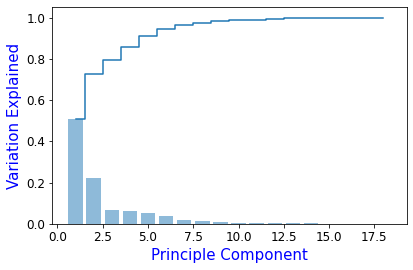

In [21]:
# Plotting Eigen Value to get dimension
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation Explained')
plt.xlabel('Principle Component')
plt.tight_layout()
plt.show()

***
**Key Observations:-**
* 8 dimensions seems very reasonable. With 10 variables we can explain over 95% of the variation in the original data!
***

### Fitting PCA with 8 dimensions and Transforming Predictors

In [22]:
# Fitting PCA
Pca = PCA(n_components=8)
display(Pca.fit(X))

# Transforming Predictors
X_pca = Pca.transform(X)

PCA(n_components=8)

***
**Key Observations:-**
* PCA is fittted with 8 dimensions.
* Data is transformed.
***

### <span style="color:#9400D3"> 5. Classifier: Design and train a best fit SVM classier using Dimensionally Reduced attributes

### Splitting Data and Fitting SVM to get Accuracies

Accuracy(%)
 Train Data = 97.09 %
 Test Data  = 94.52 %

Heatmap Showing Performance of SVM Model:-


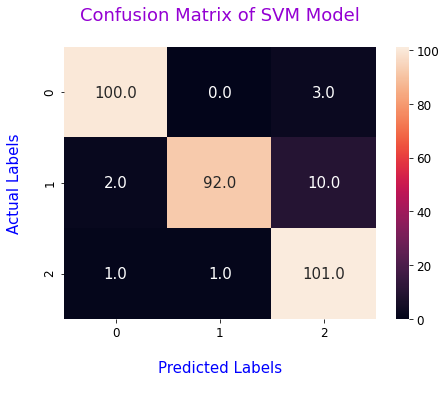

In [23]:
# Here test_size is not given because by default its value is 0.25.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1, stratify=y)

# Fitting SVM Classifier
model = SVC(gamma=0.025, C=3) 
model.fit(X_train, y_train)

# Getting Accuracy of Test Data
print('\033[1mAccuracy(%)\n Train Data =',round(model.score(X_train, y_train)*100,2),'%')
print('\033[1m Test Data  =',round(model.score(X_test, y_test)*100,2),'%')

# Building Confusion Matrix for Naive Bayes Model
test_pred = model.predict(X_test)
CM = metrics.confusion_matrix(y_test, test_pred)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for SVM Model
print('\033[1m\nHeatmap Showing Performance of SVM Model:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of SVM Model\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

### <span style="color:#9400D3"> 6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

* Dimensional reduction helps to reduce space complexity.
* More interpretable because it removes noise thus provides a simpler explanation.
* For this data when we build our model without using Dimension Reduction technique, the accuarcies were 98.17% for train data and 96.13% for test data.
* But when we use Dimension Reduction technique, the accuracies get slightly reduced.i.e Train Data = 97.09 % and Test Data  = 94.52 %.
* This is due to high correlations of the attributes, when the dimension get reduced, the accuracies are affected.

**Closing Sentence:- Dimension Reduction Technique(PCA) is implemented and Model is Trained using principal components instead of training the model using just the raw data.**

### <span style="color:#9400D3">-------------------------------------------------- End of Part THREE ------------------------------------------------------- 

***
# <span style="color:#9400D3">Part FOUR - **Project Based**                          
***

**DOMAIN:** Sports management


**CONTEXT:** Company X is a sports management company for international cricket.


**DATA DESCRIPTION:** The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far


**PROJECT OBJECTIVE:** Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

**Steps and tasks:**
1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
2. Build a data driven model to rank all the players in the dataset using all or the most important performance features.

### Exploring Dataset

In [24]:
# Loading Data
spdata = pd.read_csv('Batting_bowling_ipl_bat.csv')

# Getting Shape and Size
shape = spdata.shape

# Displaying Dataset
print('\033[1mDataset consist:-\033[0m\n Number of Rows    =',shape[0],'\n Number of Columns =',shape[1])
print('\033[1m\nDataset:-')
display(spdata.head(10))

Dataset consist:-
 Number of Rows    = 180 
 Number of Columns = 7

Dataset:-


Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
6        NaN    NaN    NaN     NaN    NaN    NaN  NaN
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0
8        NaN    NaN    NaN     NaN    NaN    NaN  NaN
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

***
**Key Observations:-**
* Dataset has 180 rows and 7 columns
***

### Checking for Null Values in the Attributes

In [25]:
# Checking for Null Values in the Attributes
print('\n\033[1mNull Values in the Features:-')
display(spdata.isnull().sum().to_frame('Null Values'))


Null Values in the Features:-


Null Values
Name            90
Runs            90
Ave             90
SR              90
Fours           90
Sixes           90
HF              90

***
**Key Observations:-**
* 90 rows are completely filled with NaN values.
* Hence its better to remove them.
***

### Dropping Null Values

In [26]:
# Dropping Null Values
spdata.dropna(inplace=True)

# Checking for Null Values After Dropping
print('\n\033[1mNull Values in the Features:-')
display(spdata.isnull().sum().to_frame('Null Values'))


Null Values in the Features:-


Null Values
Name             0
Runs             0
Ave              0
SR               0
Fours            0
Sixes            0
HF               0

***
**Key Observations:-**
* 90 NaN rows are removed.
***

### <span style="color:#9400D3"> 1. EDA and Visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.

### Brief Summary of Data

In [27]:
# Describing the data interms of count, mean, standard deviation, and 5 point summary
print('\n\033[1mBrief Summary of Dataset:-')
display(spdata.describe())


Brief Summary of Dataset:-


Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

### **Checking Skewness of the data attributes**

In [28]:
# Checking skewness of the data attributes
print('\033[1m\nSkewness of all attributes:-')  
display(spdata.skew().to_frame(name='Skewness'))


Skewness of all attributes:-


Skewness
Runs   0.754618
Ave    1.038076
SR    -1.166175
Fours  1.107192
Sixes  3.226595
HF     2.001199

### **Checking Variance of the data attributes**

In [29]:
# Checking Variance data attributes
print('\033[1m\nVariance of all attributes:-')   
display(spdata.var().to_frame(name='Variance'))


Variance of all attributes:-


Variance
Runs   24415.208989
Ave      185.483008
SR       559.632193
Fours    268.954931
Sixes     64.021973
HF         2.851561

### **Checking Covariance related with attributes**

In [30]:
# Checking Covariance related with all attributes
print('\033[1mCovariance between all attributes:-')
display(spdata.cov())

Covariance between all attributes:-


Runs          Ave           SR        Fours       Sixes  \
Runs   24415.208989  1474.707184  1824.142412  2354.480150  962.409738   
Ave     1474.707184   185.483008   200.915584   121.997954   74.364335   
SR      1824.142412   200.915584   559.632193   149.292451  110.531531   
Fours   2354.480150   121.997954   149.292451   268.954931   68.572784   
Sixes    962.409738    74.364335   110.531531    68.572784   64.021973   
HF       220.361049    14.276201    17.081012    21.703246   10.372784   

               HF  
Runs   220.361049  
Ave     14.276201  
SR      17.081012  
Fours   21.703246  
Sixes   10.372784  
HF       2.851561

### **Checking Correlation by plotting Heatmap for attributes**

Heatmap showing Correlation of Data attributes:-


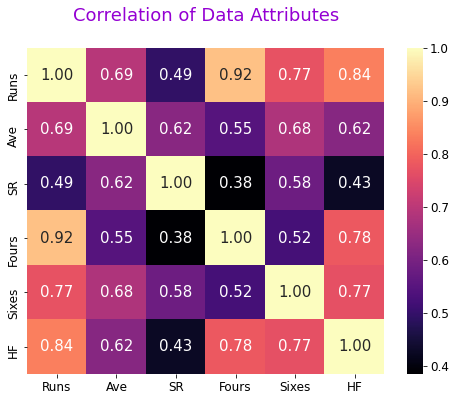

In [31]:
# Checking Correlation by plotting Heatmap for all attributes 
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(8,6))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(spdata.corr(),annot=True,fmt= '.2f',cmap='magma');
plt.show()

***
**Key Observations:-**
* In this data the mean value of attributes are almost equal to median. Hence we can expect normal distribution of the data.
* There is some slight skewness in the data
* Variance is high for most of the data.
* Correlation map is showing positive correlation between the data attributes.
***

### <u> Univariate Analysis</u>
Univariate analysis is the simplest form of analyzing data. It involves only one variable.

#### Creating Functions for Plotting the Data for Univariate Analysis.

We will use these functions for easy analysis of individual attribute.

In [32]:
def qt_data(x):   
    # Distribution plot
    print(f'\033[1mPlot Showing Distribution of Feature "{x}":-')
    plt.figure(figsize=(12,6))
    plt.title(f'Distribution of "{x}"\n')
    sns.distplot(spdata[x],color='#9400D3');
    print('')
    plt.show()
    print('\n__________________________________________________________________________________________________\n')
    print('')
    
    # Box plot for Quantitative data
    print(f'\033[1mPlot Showing 5 point summary with outliers of Attribute "{x}":-\n')
    plt.figure(figsize=(12,6))
    plt.title(f'Box Plot for "{x}"\n')
    sns.boxplot(spdata[x],color="#9400D3");
    plt.show()

* Plot Function is Created, Now we will do Univariate Analysis

#### Attribute 1: "Runs"

Plot Showing Distribution of Feature "Runs":-



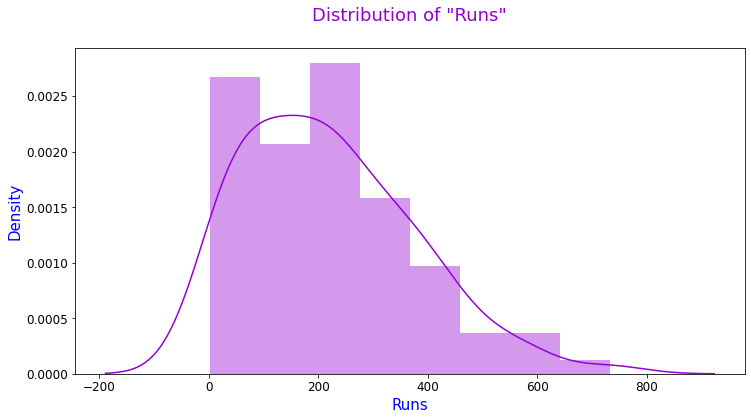


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "Runs":-



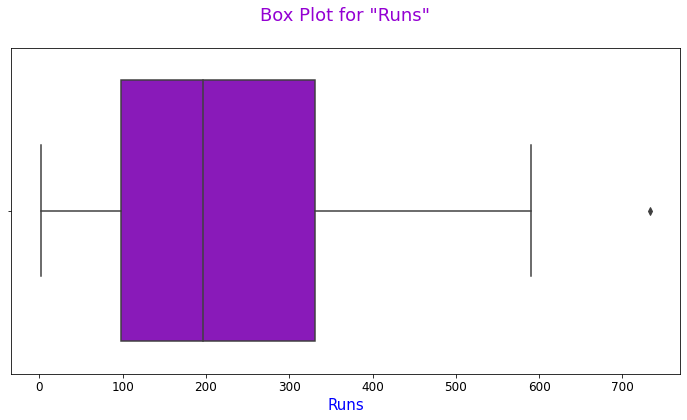

In [33]:
# Univariate analysis fpr Runs Attribute
qt_data('Runs')

#### Attribute 2: "Ave"

Plot Showing Distribution of Feature "Ave":-



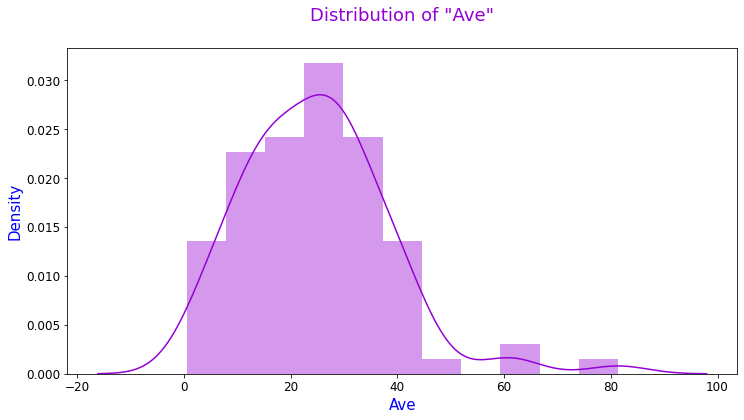


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "Ave":-



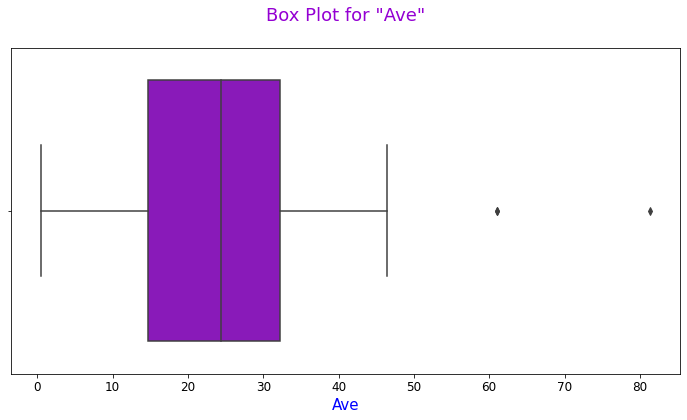

In [34]:
# Univariate analysis for Ave Attribute
qt_data('Ave')

#### Attribute 2: "Ave"

Plot Showing Distribution of Feature "Ave":-



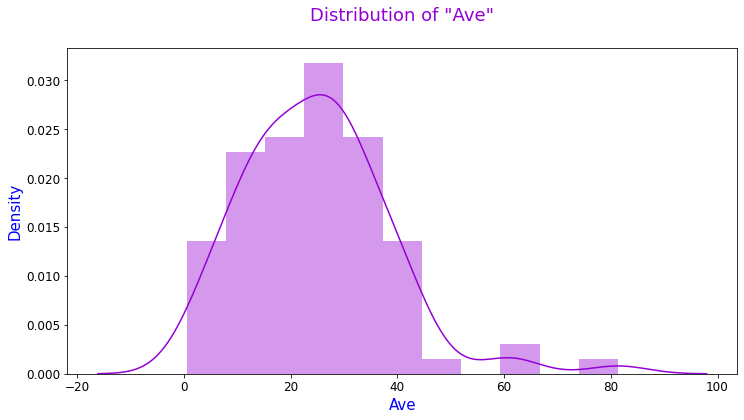


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "Ave":-



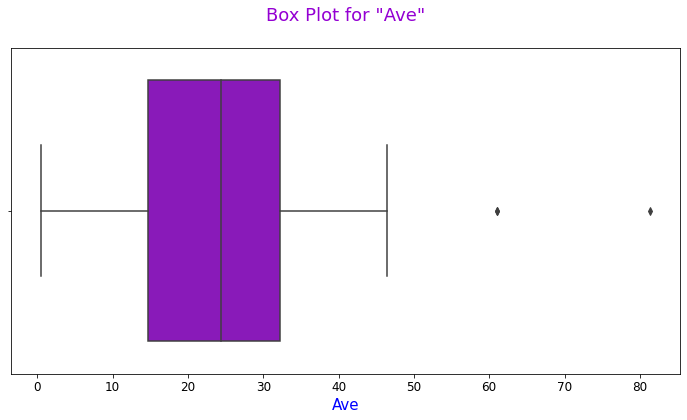

In [35]:
# Univariate analysis for Ave Attribute
qt_data('Ave')

#### Attribute 2: "SR"

Plot Showing Distribution of Feature "SR":-



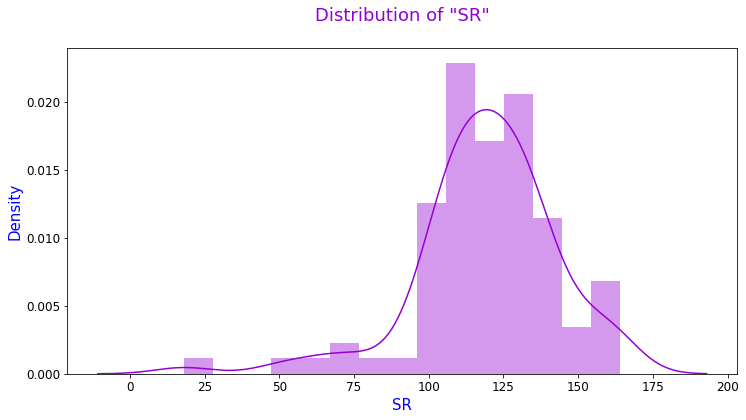


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "SR":-



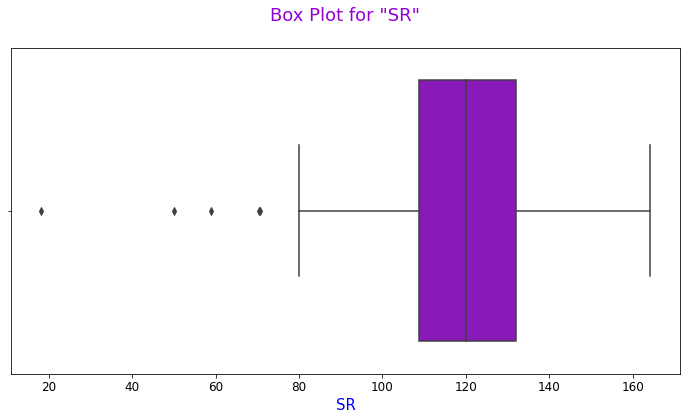

In [36]:
# Univariate analysis for SR Attribute
qt_data('SR')

#### Attribute 2: "Fours"

Plot Showing Distribution of Feature "Fours":-



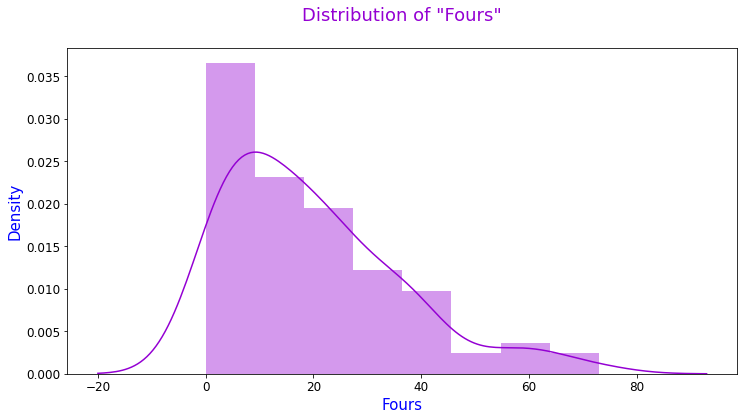


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "Fours":-



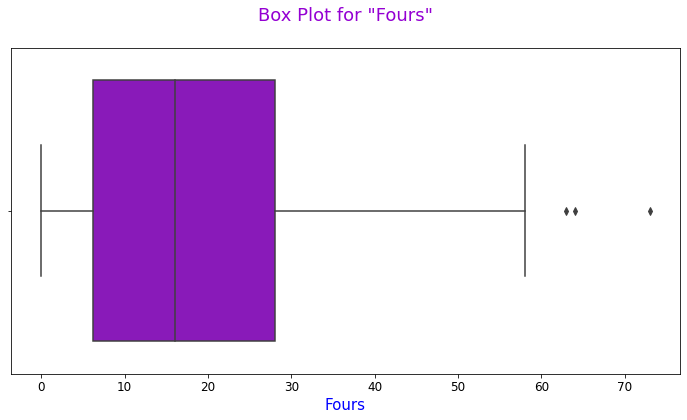

In [37]:
# Univariate analysis for Fours Attribute
qt_data('Fours')

#### Attribute 2: "Sixes"

Plot Showing Distribution of Feature "Sixes":-



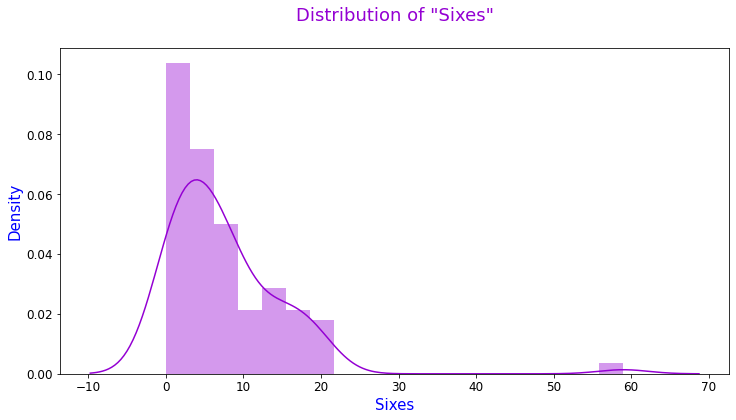


__________________________________________________________________________________________________


Plot Showing 5 point summary with outliers of Attribute "Sixes":-



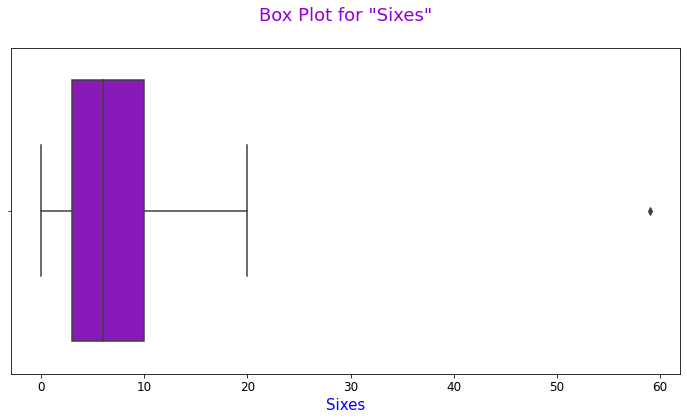

In [38]:
# Univariate analysis for Sixes Attribute
qt_data('Sixes')

#### Attribute 2: "HF"

Plot Showing Frequency Distribution of Attribute HF:-


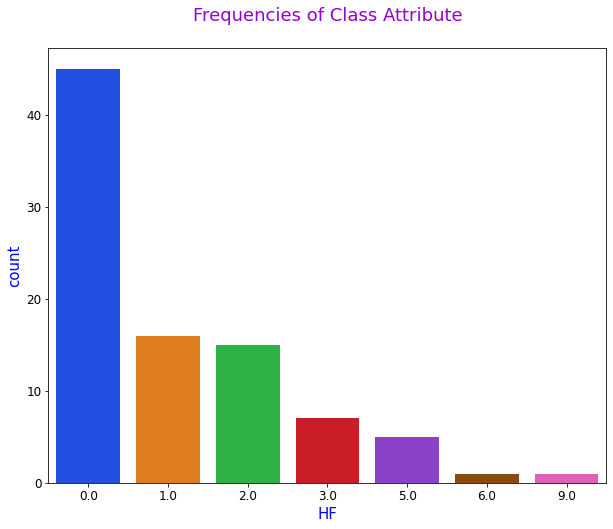


___________________________________________________________________________________


Pie Chart Showing Contribution of Each Category of HF feature:-



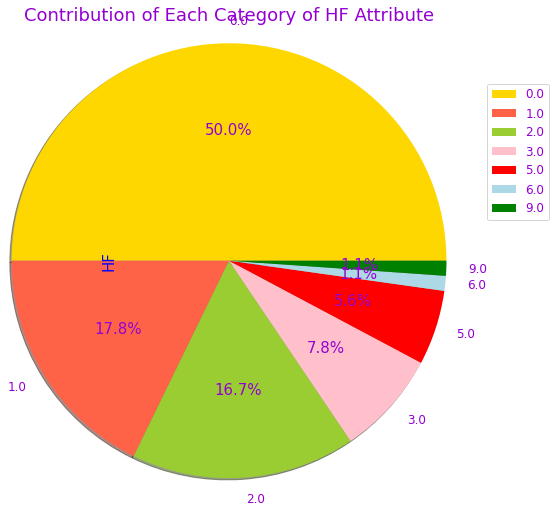

In [39]:
# Plotting Frequency Distribution of categorical attribute
colors = ['gold','tomato','yellowgreen','pink','red','#ADD8E6','green']
print(f'\033[1mPlot Showing Frequency Distribution of Attribute HF:-')
plt.figure(figsize=(10,8))
plt.title(f'Frequencies of Class Attribute\n')
sns.countplot(spdata['HF'],palette='bright');
plt.show()
print('\n___________________________________________________________________________________')
print('')
    
# Plotting Pie Chart to check contribution of categorical attribute
print(f'\033[1m\nPie Chart Showing Contribution of Each Category of HF feature:-\n')
plt.title(f'Contribution of Each Category of HF Attribute\n\n\n\n\n\n')
spdata['HF'].value_counts().plot.pie(radius=2.5,shadow=True,autopct='%1.1f%%',colors=colors);
plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
plt.show()

### <u> Bivariate Analysis</u>
    
* Bivariate Analysis is performed to find the relationship between HF Attribute VS all other Attributes


Plots Showing Bivariate Analysis of HF VS All Attributes:-



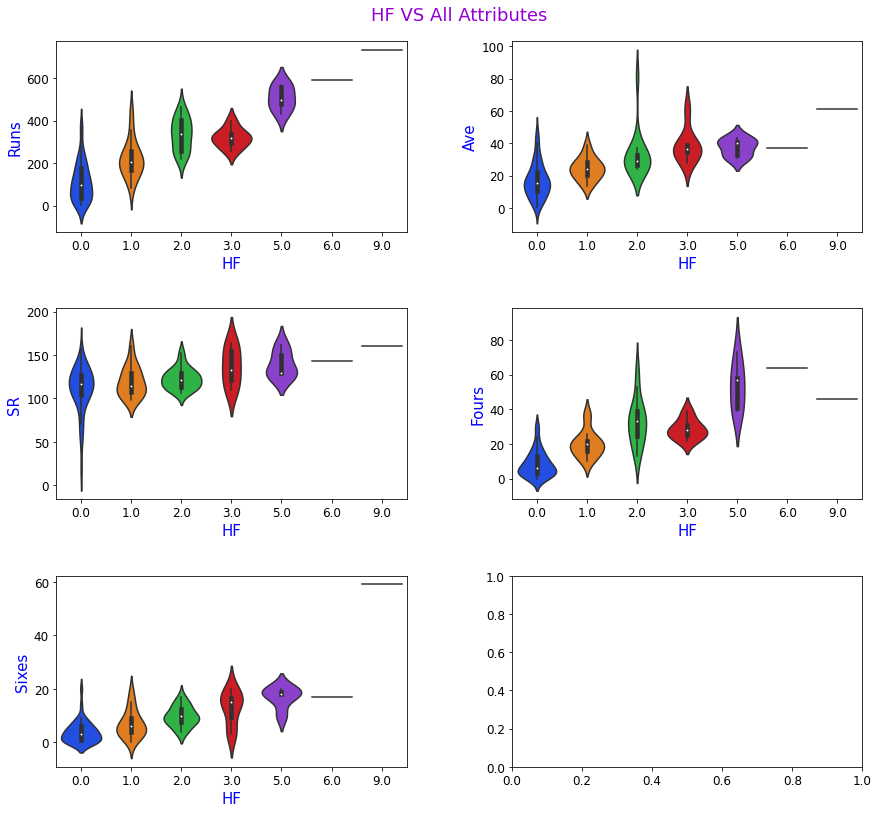

In [40]:
# Bivariate Analysis for HF VS All Attributes
print(f'\033[1m\nPlots Showing Bivariate Analysis of HF VS All Attributes:-\n')

# Setting up Sub-Plots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle(f'HF VS All Attributes')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.94, wspace=0.3, hspace=0.4)

# Plotting Sub-Plots
sns.violinplot(ax=axes[0, 0], x='HF', y='Runs', data=spdata, palette='bright');
sns.violinplot(ax=axes[0, 1], x='HF', y='Ave', data=spdata, palette='bright');
sns.violinplot(ax=axes[1, 0], x='HF', y='SR', data=spdata, palette='bright');
sns.violinplot(ax=axes[1, 1], x='HF', y='Fours', data=spdata, palette='bright');
sns.violinplot(ax=axes[2, 0], x='HF', y='Sixes', data=spdata, palette='bright');
plt.show()

### <u> Multivariate Analysis</u>
    
 Multivariate analysis is performed to understand interactions between different fields in the dataset.
    
#### Multivariate Analysis : To Check Relation Between Attributes

Plot Showing Multivariate Analysis to check Relation between Attributes:-


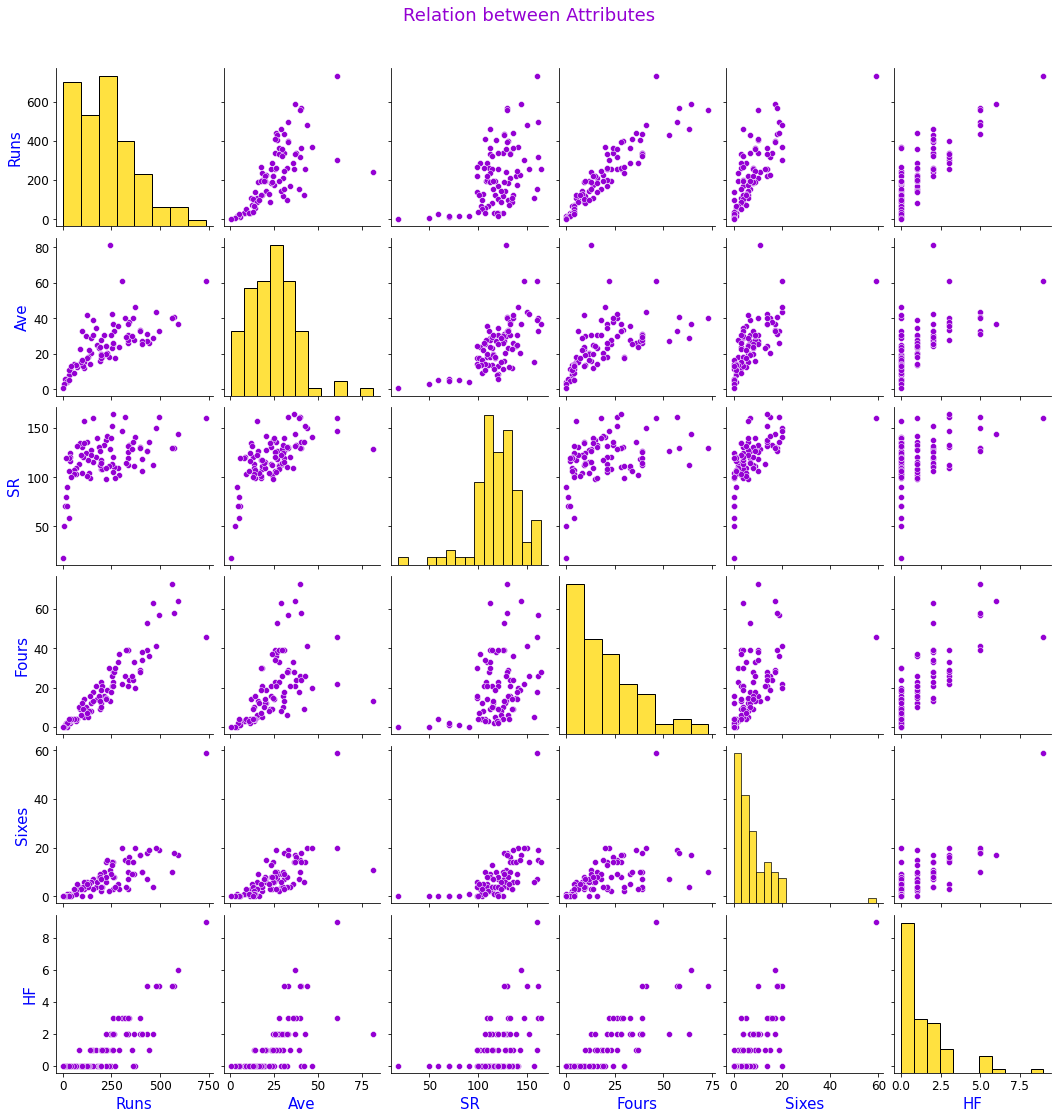

In [41]:
# Multivariate Analysis of Attributes
print('\033[1mPlot Showing Multivariate Analysis to check Relation between Attributes:-')

# Plotting pairplot for Attributes
sns.pairplot(spdata,plot_kws={'color':'#9400D3'},diag_kws={'color':'Gold'}).fig.suptitle('Relation between Attributes',
                                                                                         y=1.04);
plt.show()

**Multivariate Analysis : To check Density of Categorical Attribute in all other Attributes**

Plot Showing Multivariate Analysis to check Density of Categorical Attribute:-


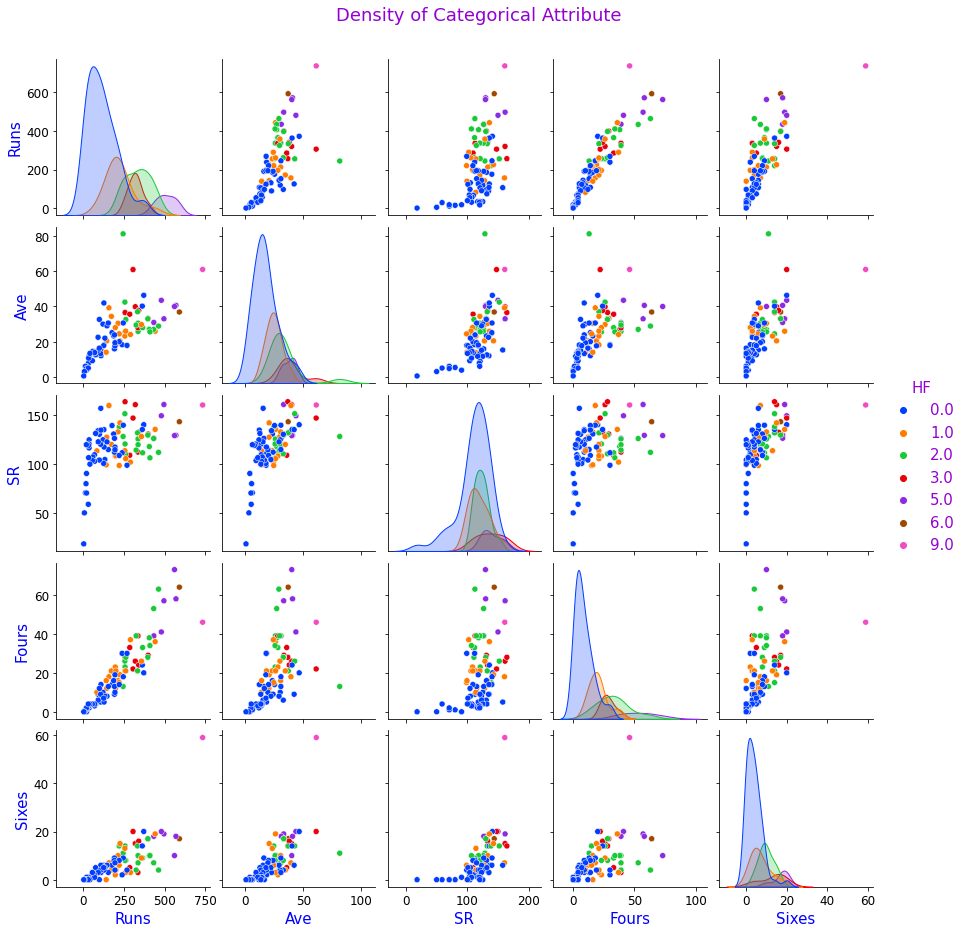

In [42]:
# Multivariate Analysis to check Density of Categorical Attribute
print('\033[1mPlot Showing Multivariate Analysis to check Density of Categorical Attribute:-')
sns.pairplot(spdata,hue='HF',palette='bright').fig.suptitle('Density of Categorical Attribute',y=1.04);
plt.show()

**Multivariate Analysis : To Check Correlation**

Heatmap showing Correlation of Data attributes:-


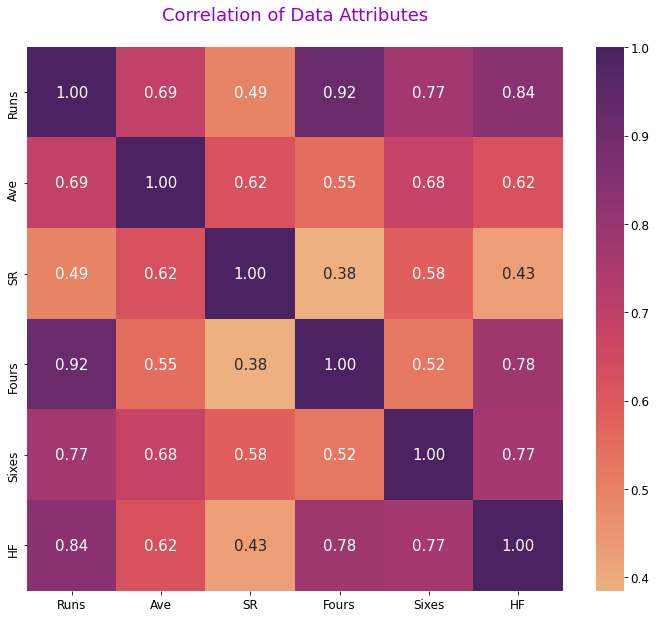

In [43]:
# Plotting Heatmap for checking Correlation
print('\033[1mHeatmap showing Correlation of Data attributes:-')
plt.figure(figsize=(12,10))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(spdata.corr(),annot=True,fmt= '.2f',cmap='flare');
plt.show()

***

### Outlier Analysis

* Outlier Analysis is a process that involves identifying the anomalous observation in the dataset.”
* An outlier is an observation that lies an abnormal distance from other values in the attribute of dataset.
* Since we have few outliers or extreme values, we will replace them by their respective mean of attribute.

NOTE:- Here we are Replacing Outliers by Mean of the Attribute without outliers. That is we will calculate Mean without outliers and then replace outliers with this calculated Mean

In [44]:
# Getting Outliers and Imputing Outliers by Mean

AT = []
OL1 = []
OL2 = []
M1 = []
M2 = []
for i in spdata.columns:
    if i!='Name':
        AT.append(i)
        
        # Getting Interquartile Range
        q1 = spdata[i].quantile(0.25)
        q3 = spdata[i].quantile(0.75)
        IQR = q3 - q1
        
        # Getting Mean of Attribute having Outliers (i.e including outliers)
        M1.append(round(spdata[i].mean(),2)) 
        
        # Getting Outlier and Normal Values Seperated
        OL = []
        NOL = []
        for k in spdata[i]:
            if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
                OL.append(k)
            else:
                NOL.append(k)
        OL1.append(len(OL))
        
        # Replacing Outliers by Mean of Normal Values
        spdata[i].replace(OL,np.mean(NOL),inplace=True) # Here we are imputing outliers by Mean of attribute without outlier
        M2.append(round(np.mean(NOL),2))
        
        # Getting Outliers After Imputation
        OL_cnt = 0
        for k in spdata[i]:
            if (k < (q1 - 1.5 * IQR) or k > (q3 + 1.5 * IQR)):
                OL_cnt += 1
        OL2.append(OL_cnt)
        
# Creting dataframe for better representation of Outlier Analysis      
Outlier_Analysis = pd.DataFrame({'Attribute':AT,
                                 'Mean Including Outliers':M1,
                                 'Outliers Before Imputation':OL1,
                                 'Mean Excluding Outliers':M2,
                                 'Outliers After Imputation':OL2})
print('\033[1mTotal Outliers Observed in Dataset =',sum(OL1))
print('\n\033[1mTable Showing Outlier Analysis:-')
display(Outlier_Analysis)    

Total Outliers Observed in Dataset = 15

Table Showing Outlier Analysis:-


Attribute  Mean Including Outliers  Outliers Before Imputation  \
0      Runs                   219.93                           1   
1       Ave                    24.73                           3   
2        SR                   119.16                           5   
3     Fours                    19.79                           3   
4     Sixes                     7.58                           1   
5        HF                     1.19                           2   

   Mean Excluding Outliers  Outliers After Imputation  
0                   214.17                          0  
1                    23.24                          0  
2                   123.02                          0  
3                    18.17                          0  
4                     7.00                          0  
5                     1.05                          0

***
**Key Observations:-**
* We found some outliers here.
* All the outliers are replaced by means of respective attributes.
***

### <span style="color:#9400D3"> 2. Build a data driven model to rank all the players in the dataset using all or the most important performance features

### Fitting PCA

In [45]:
# Dropping Name Attribute
X = spdata.drop(columns='Name')

# Applying Z-Scores to Predictors
X = X.apply(zscore)

# Fitting PCA
pca1 = PCA(n_components=6)
display(pca1.fit(X))

PCA(n_components=6)

### Plotting Eigen Value to get dimension

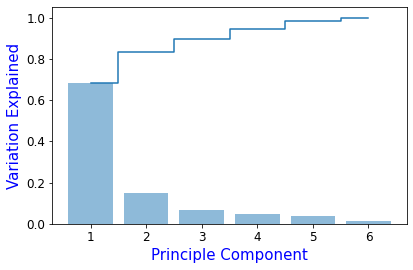

In [46]:
# Plotting Eigen Value to get dimension
plt.step(list(range(1,7)),np.cumsum(pca1.explained_variance_ratio_), where='mid')
plt.bar(list(range(1,7)),pca1.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation Explained')
plt.xlabel('Principle Component')
plt.tight_layout()
plt.show()

***
**Key Observations:-**
* 4 dimensions seems very reasonable. With 10 variables we can explain over 95% of the variation in the original data!
***

### Fitting PCA with 4 dimensions and Transforming Predictors

In [47]:
# Fitting PCA
PCa = PCA(n_components=4)
display(PCa.fit(X))

# Transforming Predictors
X_PCA = PCa.transform(X)

PCA(n_components=4)

***
**Key Observations:-**
* PCA is fitted and data is transformed
***

### Getting index values of transformed data after sorting them

In [48]:
# Converting X_PCA to dataframe
TD = pd.DataFrame(X_PCA)

# Descending Sorting the data
TD.sort_values(by=0, ascending=False, inplace=True)

# Getting index values
index = TD.index

***
**Key Observations:-**
* The transformed data is converted to dataframe.
* Then the data is sorted in decending order.
* Then index values of sorted data are captured.
***

### Re-orderinng data based on index

In [49]:
# Re-setting index values
spdata = spdata.reset_index()
spdata = spdata.drop(columns='index')

# Re-indexing 
spdata = spdata.reindex(index)

***
**Key Observations:-**
* Here first re-ordered the index values.
* Then old index column is removed.
* Then re-indexed the data based on captured index values.
* Hence we get the required order of players based on performance.
***

### Finalised Sorted Players

In [50]:
# Finalised Sorted Players
print('\033[1m\nFinalised Sorted Players:-')
display(spdata.head(10))


Finalised Sorted Players:-


Name   Runs    Ave      SR      Fours  Sixes        HF
2         V Sehwag  495.0  33.00  161.23  57.000000   19.0  5.000000
4         S Dhawan  569.0  40.64  129.61  58.000000   18.0  5.000000
3         CL White  479.0  43.54  149.68  41.000000   20.0  5.000000
7        RG Sharma  433.0  30.92  126.60  39.000000   18.0  5.000000
5        AM Rahane  560.0  40.00  129.33  18.172414   10.0  5.000000
8   AB de Villiers  319.0  39.87  161.11  26.000000   15.0  3.000000
1        G Gambhir  590.0  36.87  143.55  18.172414   17.0  1.045455
12    F du Plessis  398.0  33.16  130.92  29.000000   17.0  3.000000
10       DA Warner  256.0  36.57  164.10  28.000000   14.0  3.000000
13         OA Shah  340.0  37.77  132.81  24.000000   16.0  3.000000

***
**Key Observations:-**
* Finally we have our required list of Players for Company X based on Ranking.
***

**Closing Sentence:- Data driven batsman ranking model is built based on performance for the sports management company to make business decisions.**

### <span style="color:#9400D3">-------------------------------------------------- End of Part FOUR ------------------------------------------------------- 